In [382]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import recall_score
from joblib import dump, load
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

import joblib
import random

In [383]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

True


In [384]:
def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True


setup_seed(111)

In [385]:
new_file = 'train_and_test.xlsx'

In [386]:
new_dataframe = pd.read_excel(new_file, sheet_name=0)
new_dataframe1 = pd.read_excel(new_file, sheet_name=2)
new_dataframe2 = pd.read_excel(new_file, sheet_name=3)

In [387]:
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   性别      188 non-null    int64
 1   年龄      188 non-null    int64
 2   吸烟      188 non-null    int64
 3   原发灶大小   188 non-null    int64
 4   骨转移     188 non-null    int64
 5   脑转移     188 non-null    int64
 6   肝转      188 non-null    int64
 7   胸膜转移    188 non-null    int64
 8   联合治疗    188 non-null    int64
 9   转移个数    188 non-null    int64
 10  END     188 non-null    int64
dtypes: int64(11)
memory usage: 16.3 KB


In [388]:
new_dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   性别      188 non-null    int64
 1   年龄      188 non-null    int64
 2   吸烟      188 non-null    int64
 3   原发灶大小   188 non-null    int64
 4   骨转移     188 non-null    int64
 5   脑转移     188 non-null    int64
 6   肝转      188 non-null    int64
 7   胸膜转移    188 non-null    int64
 8   联合治疗    188 non-null    int64
 9   转移个数    188 non-null    int64
 10  TP53    188 non-null    int64
 11  PIK3CA  188 non-null    int64
 12  RB1     188 non-null    int64
 13  TMB     188 non-null    int64
 14  位点      188 non-null    int64
 15  END     188 non-null    int64
dtypes: int64(16)
memory usage: 23.6 KB


In [389]:
new_dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   性别      188 non-null    int64
 1   年龄      188 non-null    int64
 2   吸烟      188 non-null    int64
 3   原发灶大小   188 non-null    int64
 4   骨转移     188 non-null    int64
 5   脑转移     188 non-null    int64
 6   肝转      188 non-null    int64
 7   胸膜转移    188 non-null    int64
 8   联合治疗    188 non-null    int64
 9   转移个数    188 non-null    int64
 10  N       188 non-null    int64
 11  TMB     188 non-null    int64
 12  位点      188 non-null    int64
 13  END     188 non-null    int64
dtypes: int64(14)
memory usage: 20.7 KB


In [390]:
# Dataset1
X_first = new_dataframe.iloc[:,range(0,10)]
y_first = new_dataframe.iloc[:, -1]  # 第二个指标
X_first = np.asarray(X_first)

# Dataset2
X_second = new_dataframe1.iloc[:,range(0,15)]
y_second = new_dataframe1.iloc[:, -1]  # 第二个指标
X_second = np.asarray(X_second)

# Dataset3
X_third = new_dataframe2.iloc[:,range(0,13)]
y_third = new_dataframe2.iloc[:, -1]  # 第二个指标
X_third = np.asarray(X_third)

In [391]:
X_first

array([[2, 2, 2, ..., 0, 1, 1],
       [1, 2, 1, ..., 0, 1, 3],
       [2, 1, 2, ..., 0, 1, 3],
       ...,
       [2, 1, 2, ..., 0, 2, 1],
       [1, 1, 2, ..., 0, 1, 1],
       [2, 1, 2, ..., 0, 2, 1]], dtype=int64)

In [392]:
y_first = np.array(y_first)
y_second = np.array(y_second)
y_third = np.array(y_third)

In [393]:
X_train_first, X_test_first, y_train_first, y_test_first= train_test_split(X_first, y_first, test_size=0.20, random_state=100)
X_test_first = torch.Tensor(X_test_first)
X_train_first = torch.Tensor(X_train_first)
y_train_first = torch.Tensor(y_train_first)
y_test_first = torch.Tensor(y_test_first)
X_train_first.shape

torch.Size([150, 10])

In [394]:
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(X_second, y_second, test_size=0.20, random_state=100)
X_train_second = torch.Tensor(X_train_second)
X_test_second = torch.Tensor(X_test_second)
y_train_second = torch.Tensor(y_train_second)
y_test_second = torch.Tensor(y_test_second)

In [395]:
X_train_third, X_test_third, y_train_third, y_test_third = train_test_split(X_third, y_third, test_size=0.20, random_state=100)
X_train_third, X_test_third, y_train_third, y_test_third = torch.Tensor(X_train_third), torch.Tensor(X_test_third),torch.Tensor(y_train_third),torch.Tensor(y_test_third)

In [396]:
def recall(y_test, y_pred):
    zero_length = len([i for i in y_test if i == 0])
    print("zero_length", zero_length)
#     print(y_test)
#     print(y_pred)
    zero_true_count = 0
    for i in range(len(y_test)):
        if y_test[i] == 0 and y_pred[i] == 0:
            zero_true_count += 1
    return zero_true_count / zero_length

In [397]:
class Feedforward_first(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward_first, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
#             self.batchnorm = torch.nn.BatchNorm1d(self.input_size)
            self.laynorm = torch.nn.LayerNorm(self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size, bias=True)
            self.dropout1 = torch.nn.Dropout(p=0.05)
            self.relu1 = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 16, bias=True)
            self.dropout2 = torch.nn.Dropout(p=0.05)
            self.relu2 = torch.nn.ReLU()
            self.fc3 = torch.nn.Linear(16, 1, bias=True)
            self.sigmoid = torch.nn.Sigmoid()
        def forward(self, x):
            hidden = self.fc1(x)
#             batchnorm = self.batchnorm(hidden)
            hidden = self.relu(hidden)
#             laynorm = self.laynorm(hidden)
            relu = self.relu1(hidden)
            output = self.fc2(relu)
            output = self.relu2(output)
            output = self.fc3(output)
            output = self.sigmoid(output)
            return output

In [398]:
model1 = Feedforward_first(X_train_first.shape[1],20)
criterion1 = torch.nn.BCELoss()
optimizer1 = torch.optim.AdamW(model1.parameters(), lr = 0.01, weight_decay= 5e-4)
scheduler1 = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer1, gamma=0.92)

In [399]:
highest_accuracy1 = 0

In [400]:
model1.train()
epoch = 300
loss_array = []
for epoch in range(epoch):
    optimizer1.zero_grad()
    # Forward pass
    y_pred = model1(X_train_first)
    # Compute Loss
    loss = criterion1(y_pred.squeeze(), y_train_first)
    loss_array.append(float(loss.item()))
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer1.step()
    model1.eval()
    y_pred_first = model1(X_test_first)
    y_pred_first_int = []
    for item in y_pred_first:
        y_pred_first_int.append(round(float(item[0])))
    accu = np.sum(y_pred_first_int==np.array(y_test_first))/len(y_pred_first)
    if accu > highest_accuracy1:
        highest_accuracy1 = accu
        torch.save(model1, f"ann_models/model1_{highest_accuracy}.pt")

Epoch 0: train loss: 0.6956203579902649
Epoch 1: train loss: 0.6877305507659912
Epoch 2: train loss: 0.6840085983276367
Epoch 3: train loss: 0.6811735033988953
Epoch 4: train loss: 0.6783027648925781
Epoch 5: train loss: 0.6750157475471497
Epoch 6: train loss: 0.6714900135993958
Epoch 7: train loss: 0.6679670810699463
Epoch 8: train loss: 0.6639804840087891
Epoch 9: train loss: 0.659071683883667
Epoch 10: train loss: 0.6536537408828735
Epoch 11: train loss: 0.6479623913764954
Epoch 12: train loss: 0.6422200798988342
Epoch 13: train loss: 0.6363918781280518
Epoch 14: train loss: 0.6306856274604797
Epoch 15: train loss: 0.6245381832122803
Epoch 16: train loss: 0.6185076832771301
Epoch 17: train loss: 0.6126235723495483
Epoch 18: train loss: 0.6069511771202087
Epoch 19: train loss: 0.6020974516868591
Epoch 20: train loss: 0.5978983640670776
Epoch 21: train loss: 0.5947058200836182
Epoch 22: train loss: 0.5913800001144409
Epoch 23: train loss: 0.5880985260009766
Epoch 24: train loss: 0.585

Epoch 208: train loss: 0.14015063643455505
Epoch 209: train loss: 0.1390548199415207
Epoch 210: train loss: 0.13838468492031097
Epoch 211: train loss: 0.1376541256904602
Epoch 212: train loss: 0.1370978057384491
Epoch 213: train loss: 0.1372196078300476
Epoch 214: train loss: 0.1366952359676361
Epoch 215: train loss: 0.13820411264896393
Epoch 216: train loss: 0.141880601644516
Epoch 217: train loss: 0.14750121533870697
Epoch 218: train loss: 0.15098635852336884
Epoch 219: train loss: 0.14464817941188812
Epoch 220: train loss: 0.13226808607578278
Epoch 221: train loss: 0.13736963272094727
Epoch 222: train loss: 0.14633503556251526
Epoch 223: train loss: 0.135326087474823
Epoch 224: train loss: 0.13041749596595764
Epoch 225: train loss: 0.137223482131958
Epoch 226: train loss: 0.13397866487503052
Epoch 227: train loss: 0.12824399769306183
Epoch 228: train loss: 0.13065464794635773
Epoch 229: train loss: 0.13039229810237885
Epoch 230: train loss: 0.1272634118795395
Epoch 231: train loss: 

Text(0, 0.5, 'Loss Value')

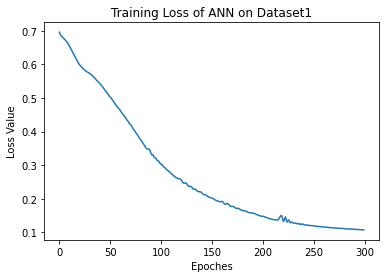

In [401]:
plt.plot(loss_array)
plt.title("Training Loss of ANN on Dataset1")
plt.xlabel("Epoches")
plt.ylabel("Loss Value")

In [402]:
model1.eval()
y_pred_first = model1(X_test_first)
y_pred_first_int = []

for item in y_pred_first:
    y_pred_first_int.append(round(float(item[0])))

print("dataset1 test accuracy:", np.sum(y_pred_first_int==np.array(y_test_first))/len(y_pred_first_int))

dataset1 test accuracy: 0.6052631578947368


In [403]:
### accuracy on training set
y_pred_first = model1(X_train_first)
y_pred_int_first = []

for item in y_pred_first:
    y_pred_int_first.append(round(float(item[0])))

print("dataset1 train accuracy:", np.sum(y_pred_int_first==np.array(y_train_first))/len(y_pred_int_first))

dataset1 train accuracy: 0.9466666666666667


In [404]:
class Feedforward_second(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward_second, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.batchnorm = torch.nn.BatchNorm1d(self.hidden_size)
            self.laynorm = torch.nn.LayerNorm(self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size, bias=True)
            self.dropout1 = torch.nn.Dropout(p=0.05)
            self.relu1 = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 16, bias=True)
            self.dropout2 = torch.nn.Dropout(p=0.05)
            self.relu2 = torch.nn.ReLU()
            self.fc3 = torch.nn.Linear(16, 1, bias=True)
            self.sigmoid = torch.nn.Sigmoid()
        def forward(self, x):
            hidden = self.fc1(x)
            batchnorm = self.batchnorm(hidden)
            hidden = self.relu(batchnorm)
            relu = self.relu1(hidden)
            output = self.fc2(relu)
            output = self.relu2(output)
            output = self.fc3(output)
            output = self.sigmoid(output)
            return output

In [405]:
model2 = Feedforward_second(X_train_second.shape[1],20)
criterion2 = torch.nn.BCELoss()
optimizer2 = torch.optim.AdamW(model2.parameters(), lr = 0.005, weight_decay= 5e-4)
scheduler2 = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer2, gamma=0.92)

In [406]:
import datetime
now = str(datetime.datetime.now().year) + "_" + str(datetime.datetime.now().month) + "_" + str(datetime.datetime.now().day) + "_" + \
str(datetime.datetime.now().hour) + "_" + str(datetime.datetime.now().minute) + "_" + str(datetime.datetime.now().second)
model2.train()
epoch = 500
loss_array = []
highest_accuracy = 0
for epoch in range(epoch):
    optimizer2.zero_grad()
    # Forward pass
    y_pred = model2(X_train_second)
    # Compute Loss
    loss = criterion2(y_pred.squeeze(), y_train_second)
    loss_array.append(float(loss.item()))
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer2.step()
    model2.eval()
    y_pred_second = model2(X_test_second)
    y_pred_second_int = []
    for item in y_pred_second:
        y_pred_second_int.append(round(float(item[0])))
#     fpr2, tpr2, thersholds2 = roc_curve(y_test_second, y_pred_second_int, pos_label=1)
    test_acc = np.sum(y_pred_second_int==np.array(y_test_second))/len(y_test_second)
    if test_acc > highest_accuracy:
        highest_accuracy = test_acc
        torch.save(model2, f"ann_models/model2_{test_acc}.pt")


#     scheduler2.step()

Epoch 0: train loss: 0.7083349823951721
Epoch 1: train loss: 0.6993156671524048
Epoch 2: train loss: 0.6953584551811218
Epoch 3: train loss: 0.692371129989624
Epoch 4: train loss: 0.6901469230651855
Epoch 5: train loss: 0.6885910034179688
Epoch 6: train loss: 0.6873424053192139
Epoch 7: train loss: 0.6862092018127441
Epoch 8: train loss: 0.6851421594619751
Epoch 9: train loss: 0.683955729007721
Epoch 10: train loss: 0.6825899481773376
Epoch 11: train loss: 0.68099445104599
Epoch 12: train loss: 0.6791777610778809
Epoch 13: train loss: 0.677148163318634
Epoch 14: train loss: 0.674818754196167
Epoch 15: train loss: 0.672393262386322
Epoch 16: train loss: 0.6697993278503418
Epoch 17: train loss: 0.6670143008232117
Epoch 18: train loss: 0.6638597249984741
Epoch 19: train loss: 0.6601210236549377
Epoch 20: train loss: 0.6560182571411133
Epoch 21: train loss: 0.6516657471656799
Epoch 22: train loss: 0.6472405791282654
Epoch 23: train loss: 0.6424906253814697
Epoch 24: train loss: 0.637192070

Epoch 264: train loss: 0.053746312856674194
Epoch 265: train loss: 0.05347452685236931
Epoch 266: train loss: 0.05304303020238876
Epoch 267: train loss: 0.05262279510498047
Epoch 268: train loss: 0.05202435702085495
Epoch 269: train loss: 0.05182266980409622
Epoch 270: train loss: 0.05137688294053078
Epoch 271: train loss: 0.05092502757906914
Epoch 272: train loss: 0.05061061680316925
Epoch 273: train loss: 0.050079114735126495
Epoch 274: train loss: 0.04957924783229828
Epoch 275: train loss: 0.04928860068321228
Epoch 276: train loss: 0.04877660423517227
Epoch 277: train loss: 0.04840238392353058
Epoch 278: train loss: 0.04805493727326393
Epoch 279: train loss: 0.04747471958398819
Epoch 280: train loss: 0.04712644964456558
Epoch 281: train loss: 0.04675522446632385
Epoch 282: train loss: 0.046299226582050323
Epoch 283: train loss: 0.045926667749881744
Epoch 284: train loss: 0.04545924812555313
Epoch 285: train loss: 0.04511153697967529
Epoch 286: train loss: 0.044620174914598465
Epoch 

In [407]:
highest_accuracy

0.8421052631578947

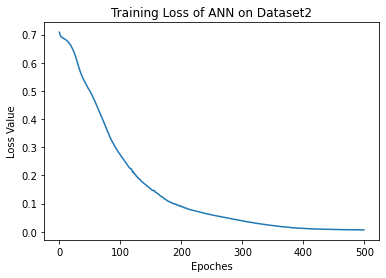

In [408]:
plt.plot(loss_array)
plt.title("Training Loss of ANN on Dataset2")
plt.xlabel("Epoches")
plt.ylabel("Loss Value")
plt.savefig("LOSs.png", dpi=300)

In [409]:
model2 = torch.load(f"ann_models/model2_{highest_accuracy}.pt")
model2.eval()
y_pred_second = model2(X_test_second)
y_pred_second_int = []

for item in y_pred_second:
    y_pred_second_int.append(round(float(item[0])))

print("dataset2 test accuracy:", np.sum(y_pred_second_int==np.array(y_test_second))/len(y_test_second))

dataset2 test accuracy: 0.8421052631578947


In [410]:
recall(y_test_second, y_pred_second_int)

zero_length 11


0.8181818181818182

In [411]:
### accuracy on training set
y_pred_second = model2(X_train_second)
y_pred_int_second = []

for item in y_pred_second:
    y_pred_int_second.append(round(float(item[0])))

print("dataset2 train accuracy:",np.sum(y_pred_int_second==np.array(y_train_second))/len(y_pred_int_second))

dataset2 train accuracy: 0.9933333333333333


In [375]:
class Feedforward_third(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward_third, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
#             self.batchnorm = torch.nn.BatchNorm1d(self.input_size)
            self.laynorm = torch.nn.LayerNorm(self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size, bias=True)
            self.dropout1 = torch.nn.Dropout(p=0.05)
            self.relu1 = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 16, bias=True)
            self.dropout2 = torch.nn.Dropout(p=0.05)
            self.relu2 = torch.nn.ReLU()
            self.fc3 = torch.nn.Linear(16, 1, bias=True)
            self.sigmoid = torch.nn.Sigmoid()
        def forward(self, x):
            hidden = self.fc1(x)
#             batchnorm = self.batchnorm(hidden)
            hidden = self.relu(hidden)
#             laynorm = self.laynorm(hidden)
            relu = self.relu1(hidden)
            output = self.fc2(relu)
            output = self.relu2(output)
            output = self.fc3(output)
            output = self.sigmoid(output)
            return output

In [376]:
model3 = Feedforward_third(X_train_third.shape[1],20)
criterion3 = torch.nn.BCELoss()
optimizer3 = torch.optim.AdamW(model3.parameters(), lr = 0.01, weight_decay= 5e-4)
scheduler3 = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer3, gamma=0.92)

In [377]:
model3.train()
epoch = 300
loss_array = []
for epoch in range(epoch):
    optimizer3.zero_grad()
    # Forward pass
    y_pred = model3(X_train_third)
    # Compute Loss
    loss = criterion3(y_pred.squeeze(), y_train_third)
    loss_array.append(float(loss.item()))
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer3.step()
#     scheduler3.step()

Epoch 0: train loss: 0.6914355158805847
Epoch 1: train loss: 0.6883177161216736
Epoch 2: train loss: 0.682964563369751
Epoch 3: train loss: 0.6778934001922607
Epoch 4: train loss: 0.6738179326057434
Epoch 5: train loss: 0.6686853170394897
Epoch 6: train loss: 0.6625958681106567
Epoch 7: train loss: 0.6564165353775024
Epoch 8: train loss: 0.649475634098053
Epoch 9: train loss: 0.6408642530441284
Epoch 10: train loss: 0.6313442587852478
Epoch 11: train loss: 0.6215068697929382
Epoch 12: train loss: 0.6106422543525696
Epoch 13: train loss: 0.599166989326477
Epoch 14: train loss: 0.5886470675468445
Epoch 15: train loss: 0.5783089399337769
Epoch 16: train loss: 0.5692555904388428
Epoch 17: train loss: 0.5622988939285278
Epoch 18: train loss: 0.557673454284668
Epoch 19: train loss: 0.5544764399528503
Epoch 20: train loss: 0.5532222390174866
Epoch 21: train loss: 0.5512521266937256
Epoch 22: train loss: 0.5494428277015686
Epoch 23: train loss: 0.5464891195297241
Epoch 24: train loss: 0.542886

Epoch 283: train loss: 0.115512415766716
Epoch 284: train loss: 0.11497247219085693
Epoch 285: train loss: 0.11233103275299072
Epoch 286: train loss: 0.10908715426921844
Epoch 287: train loss: 0.10602020472288132
Epoch 288: train loss: 0.10454672574996948
Epoch 289: train loss: 0.1044282615184784
Epoch 290: train loss: 0.10558149218559265
Epoch 291: train loss: 0.10764904320240021
Epoch 292: train loss: 0.10853680968284607
Epoch 293: train loss: 0.1088031530380249
Epoch 294: train loss: 0.10854807496070862
Epoch 295: train loss: 0.10621585696935654
Epoch 296: train loss: 0.101873978972435
Epoch 297: train loss: 0.09922315925359726
Epoch 298: train loss: 0.0989360511302948
Epoch 299: train loss: 0.10013803094625473


Text(0, 0.5, 'Loss Value')

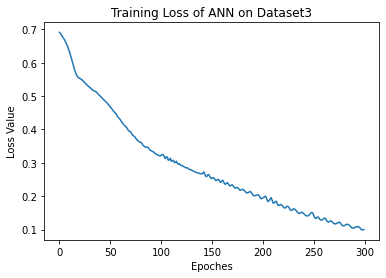

In [378]:
plt.plot(loss_array)
plt.title("Training Loss of ANN on Dataset3")
plt.xlabel("Epoches")
plt.ylabel("Loss Value")

In [379]:
model3.eval()
y_pred = model3(X_test_third)
y_pred_third_int = []

for item in y_pred:
    y_pred_third_int.append(round(float(item[0])))
    
y_test_third = np.array(y_test_third)
print("dataset3 test accuracy:", np.sum(y_pred_third_int==y_test_third)/len(y_pred_third_int))

dataset3 test accuracy: 0.6578947368421053


In [380]:
### accuracy on training set
y_pred_third = model3(X_train_third)
y_pred_int_third = []

for item in y_pred_third:
    y_pred_int_third.append(round(float(item[0])))

print("dataset3 train accuracy:", np.sum(y_pred_int_third==np.array(y_train_third))/len(y_pred_int_third))

dataset3 train accuracy: 0.9666666666666667


C:\Users\think\AppData\Local\Temp/ipykernel_17980/3643420365.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(fpr1, tpr1, 'k--', label='ROC (area = {0:.2f}) without Gene Sequence'.format(roc_auc1), lw=2, color='b')
C:\Users\think\AppData\Local\Temp/ipykernel_17980/3643420365.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(fpr3, tpr3, 'k--', label='ROC (area = {0:.2f}) with Number of Mutated Genes'.format(roc_auc3), lw=2, color='g')
C:\Users\think\AppData\Local\Temp/ipykernel_17980/3643420365.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(fpr2, tpr2, 'k--', label='ROC (area = {0:.2f}) with TB53,rb1 and pik3ca'

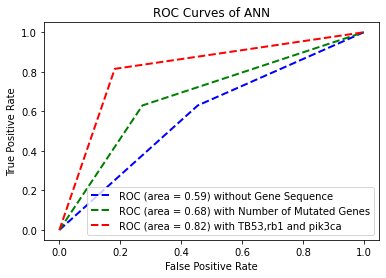

In [381]:
### ROC and AUC for ANN1

# y_label = y_train_first.int().tolist()  # 非二进制需要pos_label
# y_pre = y_pred_int
# print(y_label)
# print(y_pre)
fpr1, tpr1, thersholds1 = roc_curve(y_test_first, y_pred_first_int, pos_label=1)
fpr2, tpr2, thersholds2 = roc_curve(y_test_second, y_pred_second_int, pos_label=1)
fpr3, tpr3, thersholds3 = roc_curve(y_test_third, y_pred_third_int, pos_label=1)


 
# for i, value in enumerate(thersholds):
#     print("%f %f %f" % (fpr[i], tpr[i], value))
 
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
 
plt.plot(fpr1, tpr1, 'k--', label='ROC (area = {0:.2f}) without Gene Sequence'.format(roc_auc1), lw=2, color='b')
plt.plot(fpr3, tpr3, 'k--', label='ROC (area = {0:.2f}) with Number of Mutated Genes'.format(roc_auc3), lw=2, color='g')
plt.plot(fpr2, tpr2, 'k--', label='ROC (area = {0:.2f}) with TB53,rb1 and pik3ca'.format(roc_auc2), lw=2, color='r')

 
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('ROC Curves of ANN')
plt.legend(loc="lower right")